In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# Make a color palette for the swarmplot that colors replicates differently.
greys = sns.color_palette('Greys', n_colors=8)
greens = sns.color_palette('Greens', n_colors=8)
purples = sns.color_palette('Purples', n_colors=8)
reddish_purple = sns.set_hls_values(sns.xkcd_rgb['reddish purple'], 0.9, 0.3, 1)
reddish = sns.xkcd_rgb['raspberry']

In [3]:
# Load endpoint growth data of mutants from four days of growth
# Endpoint data (4 days) from matched 3mL cultures in 10% CO2 and ambient. 
matched_od_4day_df = pd.read_csv('data/fig3/090619_CCMB1_mutants_endpointODs_tubes.csv')
mo4d = matched_od_4day_df
amb_4day_df = mo4d[mo4d.condition == 'amb']
highCO2_4day_df = mo4d[mo4d.condition == '10% CO2']

# Calculate mean values for the 3mL scale experiment. 
mean_4day_10pct = highCO2_4day_df.groupby('strain_name').mean()
mean_amb_4day_df = amb_4day_df.groupby('strain_name').mean()

std_4day_10pct = highCO2_4day_df.groupby('strain_name').std()
std_4day_amb = amb_4day_df.groupby('strain_name').std()

In [4]:
# Endpoint data (~4 days) from matched 3mL cultures in 10% CO2 and ambient. 
# Matched cultures in 10% and ambient CO2. 
matched_12day_od_df = pd.read_csv('data/fig3/020420_CCMB1_mutants_endpoint.csv')
mo12d = matched_12day_od_df
highCO2_12day_df = mo12d[mo12d.condition == '10% CO2']
amb_12day_df = mo12d[mo12d.condition == 'ambient']

# Calculate mean values for 12day experiment. 
mean_12day_10pct = highCO2_12day_df.groupby('short_name').mean()
mean_12day_amb = amb_12day_df.groupby('short_name').mean()

std_12day_10pct = highCO2_12day_df.groupby('short_name').std()
std_12day_amb = amb_12day_df.groupby('short_name').std()

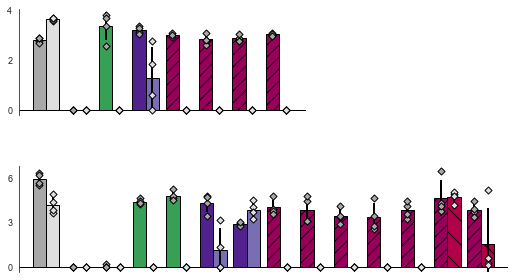

In [33]:
# Combined figure of four day and 12 day growth experiments. 
fig = plt.figure(figsize=(7.25,4))
gs = fig.add_gridspec(2,2, width_ratios=[1.5, 1])
sns.set_style('white')

ax0 = fig.add_subplot(gs[0, 0]) 

# set the order for this panel
order = ['CAfree+EGFP/HCAII', 'lsK194M/AGFP', 'ls/AGFP', '13.6 recons',
 '13.6 C173s/Ccm11', '13.6 dS2/Ccm11', '13.6 d4AB/Ccm11', '13.6 Cb11/ dDab1', ]
ticknames = ['Pos.', "Neg.", 'p1A/vec', "pCB'/pCCM'",
 "pCB' csosCA$^-$/pCCM'", "pCB' csos2-$\Delta$NTD/pCCM'", "pCB' $\Delta$csos4AB/pCCM'",
 "pCB'/pCCM' DabA1$^-$", ]

# manually set bar colors. could have done this more elegantly...
bars_10pct = [
    greys[3], greys[3], # controls - grey
    # Rubisco alone/no carboxysome - green
    greens[-3],
    # Full CCM gene set
    purples[-1],
    # Mutants with most of the CCM are red/purple
    reddish_purple, reddish_purple, reddish_purple, reddish_purple]

bars_amb = [
    greys[1], greys[1],
    greens[-5],
    purples[-3],
    reddish_purple, reddish_purple, reddish_purple, reddish_purple]


xs = np.arange(len(order))
width = 0.4
offset = width/2
bars_10pct = plt.bar(xs-offset, mean_4day_10pct.loc[order].OD.values, color=bars_10pct, width=width, edgecolor='k')
plt.bar(xs+offset, mean_amb_4day_df.loc[order].OD.values, color=bars_amb, width=width, edgecolor='k')

# Hatches for the mutants
for bar in bars_10pct[-4:]:
    bar.set_hatch('//')

for i, name in enumerate(order):
    my_xs = np.ones(4)*i
    plt.scatter(my_xs-offset, highCO2_4day_df[highCO2_4day_df.strain_name == name].OD.values,
                marker='D', s=25, color=greys[3], edgecolors='k', zorder=10)
    plt.scatter(my_xs+offset, amb_4day_df[amb_4day_df.strain_name == name].OD.values,
                marker='D', s=25, color=greys[1], edgecolors='k', zorder=10)

# TODO: prefer 95% CI to std deviation
plt.errorbar(xs-0.2, mean_4day_10pct.loc[order].OD.values, yerr=std_4day_10pct.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.errorbar(xs+0.2, mean_amb_4day_df.loc[order].OD.values, yerr=std_4day_amb.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.axhline(0, lw=1, c='k')

#plt.xticks(np.arange(len(ticknames)), ticknames, rotation=45, fontsize=14, ha='right')
plt.xticks([])
plt.yticks(np.arange(0, 4.1, 2.0), fontsize=9)
plt.xlabel('')
#plt.ylabel('Final Density', fontsize=20)
plt.ylim(-0.2, 4.05)
plt.xlim(-0.8, 7.8)
sns.despine(bottom=True)

ax2 = fig.add_subplot(gs[1, :])

# set the order for this panel
order = ['pos', # pos control
         'lsK194M/AGFP', 'full CCM K194M', # negatives
         'ls/AGFP', 'ls/pCCM 13.6', # rubisco alone
         'full CCM pre', 'full CCM post', # full CCM +/- evolution
         # mutants with well-understood expected phenotypes 
         'csosCA C173S', 'cbbL Y72R', 'csos2 dNTD', 'dcsos4AB', 'DabA1-',
         # mutants with uncertain expected phenotypes
         'cbbQ-', 'dacRAF', ]
ticknames = ['Pos.', 
             'cbbL$^-$', 'cbbL$^-$ + pCCM', 
             'rub. alone', 'rub. + pCCM', 
             'full CCM pre', 'full CCM post',
             'csosCA$^-$', 'cbbL Y72R', 'csos2-$\Delta$NTD', '$\Delta$csos4AB', 'DabA1$^-$',
             'cbbQ$^-$', '$\Delta$acRAF'] 

# manually set bar colors.
bars_10pct = [
    greys[3], greys[3], greys[3], # controls - grey
    # Rubisco alone/no carboxysome - green
    greens[-3], greens[-3],
    # Full CCM gene set
    purples[-1], purples[-1],
    # Mutants with most of the CCM are red/purple
    reddish_purple, reddish_purple, reddish_purple, reddish_purple, reddish_purple,
    reddish_purple, reddish_purple]

bars_amb = [
    greys[1], greys[1], greys[1],
    greens[-5], greens[-5],
    purples[-3], purples[-3],
    reddish, reddish, reddish, reddish, reddish,
    reddish, reddish]

xs = np.arange(len(order))

width = 0.4
offset = width/2
bars_10pct = plt.bar(xs-offset, mean_12day_10pct.loc[order].OD.values, color=bars_10pct, width=width, edgecolor='k')
bars_amb = plt.bar(xs+offset, mean_12day_amb.loc[order].OD.values, color=bars_amb, width=width, edgecolor='k')

for bar in bars_10pct[-7:]:
    bar.set_hatch('//')
for bar in bars_amb[-7:]:
    bar.set_hatch("\\")

for i, name in enumerate(order):
    my_xs = np.ones(4)*i
    plt.scatter(my_xs-offset, highCO2_12day_df[highCO2_12day_df.short_name == name].OD.values,
                marker='D', s=25, color=greys[3], edgecolors='k', zorder=10)
    plt.scatter(my_xs+offset, amb_12day_df[amb_12day_df.short_name == name].OD.values,
                marker='D', s=25, color=greys[1], edgecolors='k', zorder=10)

# TODO: prefer 95% CI to std deviation
plt.errorbar(xs-0.2, mean_12day_10pct.loc[order].OD.values, yerr=std_12day_10pct.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.errorbar(xs+0.2, mean_12day_amb.loc[order].OD.values, yerr=std_12day_amb.loc[order].OD.values, color='k', ls='', elinewidth=2)
plt.axhline(0, lw=1, c='k')

# Drop ticks for illustrator.
#plt.xticks(np.arange(len(ticknames)), ticknames, rotation=45, fontsize=14, ha='right')
plt.xticks([])
plt.yticks(np.arange(0, 6.1, 3.0), fontsize=9)
plt.xlabel('')
#plt.ylabel('Final Density', fontsize=20)
plt.ylim(-0.3, 6.8)
plt.xlim(-0.8, 13.8)
sns.despine(bottom=True)

plt.tight_layout(h_pad=5)
plt.savefig('figS7/figS7.png', dpi=300)
plt.show()